# ANALISI SULLA QUALITA' DELLA VITA NEI PAESI DEL MONDO

Il progetto deve essere così formato: 

- Introduzione: definire il problema affrontato, le principali domande di analisi dei dati e dire perchè questo progetto può essere interessante

- Dati: descrivere i dati utilizzati per il progetto

- Analisi: analizzare i dati utilizzano gli strumenti e gli algoritmi appropriati, riportando considerazioni sia qualitative che quantitative. Descrivere gli algoritmi utilizzati o progettati e discutere i risultati ottenuti

- Conclusioni: riportare le conclusioni tratte dal progetto



## INTRODUZIONE

La qualità della vita di tutti i giorni non può essere mai descritta con un numeretto o con una singola parola per ognuno di noi, ma tuttavia è abbastanza intuitivo capire che il come viviamo, il come scorre il tempo nel logo in cui stiamo, dipende da diversi fattori che facilmente influenzano le nostra abitudini. Ci chiediamo spesso se il posto in cui viviamo è quello giusto per noi, se esistono altri posti nel mondo in cui potremmo trovare la nostra confort zone. Ci chiediamo inoltre se la nostra vita sta migliorando anno dopo anno, se il nostro paese sta attuando cambiamenti che influenzano in un qualche modo la vita del popolo etc...

L'obiettivo di quesot progetto è proprio quello di analizzare indici che influenzano la qualità della vita in un paese, analizzare quali nazioni sono le migliori in determinati indici, quali stanno evolvendo nel corso degli anni etc...

Questo progetto può risultare utile nel capire in quali nazioni si vive meglio, in quali nazioni determinati indici sono ottimi o sono critici o capire quali fattori migliorare o stanno migliorando nel passare degli anni nelle varie nazioni, capendo la correlazioe che c'è tra certi fattori e la qualità della vita

Il progetto si pone come obiettivo anche quello di cercare di prevedere quali saranno i futuri indici di qualità della vita e quale sarà la qualità della vita in determinate nazioni in base a determinati parametri



## DESCRIZIONE DATASET


Questo dataset contiene indici di qualità della vita per vari paesi dal mondo estratti tramite
uno script dal sito web Numbeo , sito che fornisce informazioni aggiornate riguardo le
condizioni di vita nelle varie parti del mondo (costo della vita, situazione sanitaria,
inquinamento etc...)
Nel dataset troveremo ogni riga che esprime i vari parametri per ogni nazione e per l’anno
analizzato. Le colonne del dataset sono:
• Ranking ( il ranking globale della nazione basato sull’indice di qualità della vita in
accordo con anno)
• Nazione (il nome della nazione)
• Indice di qualità di vita (un indice composto che valuta in totale la qualità della vita
nella nazione)
• Purchasing power index (misura il potere di acquisto relativo ad un consumatore
medio rispetto a New York, base=100)
• Indice di sicurezza (un indice alto indica un ambiente più sicuro)
• Indice di sanità (indice della qualità e della accessibilità alla sanità in un paese)
• Costo della vita (misura i costi della vita rispetto a New York, base = 100)
• Property price ( confronta l’accessibilità economica degli immobili dividendo il
prezzo medio delll’immobile per il reddito medio nella nazione)
• Tempo speso nel traffico ( il tempos medio speso a causa del traffico)
• Indice di inquinamento (il livello di inquinamento generale nella nazione)
• Indice climatico ( condizioni climatiche favorevoli, higher = più alto)
• Anno (anno dove le metriche sono state estratte)




## ANALISI DEL DATASET

In [2]:
import pandas as pd

In [3]:

data = pd.read_csv("./quality_of_life_indices_by_country.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1495 non-null   int64  
 1   Country                         1495 non-null   object 
 2   Quality of Life Index           1495 non-null   float64
 3   Purchasing Power Index          1495 non-null   float64
 4   Safety Index                    1495 non-null   float64
 5   Health Care Index               1495 non-null   float64
 6   Cost of Living Index            1495 non-null   float64
 7   Property Price to Income Ratio  1495 non-null   float64
 8   Traffic Commute Time Index      1495 non-null   float64
 9   Pollution Index                 1495 non-null   float64
 10  Climate Index                   1495 non-null   object 
 11  Year                            1495 non-null   object 
dtypes: float64(8), int64(1), object(3)

### descrivo le colonne che troviamo nel dataset:

### osss
- dire se qualitative o quantititative

Il dataset contiene 1495 righe ognuna contenente valori per le seguenti colonne: 

-  **Rank** : ranking in base all'indice di qualità della vita per l'anno sotto analisi (INT)
-  **Country** : nome della nazione (OBJECT)
-  **Quality of life index** : idnice che valuta in totalità la qualità della vita per quella nazione per l'anno  (FLOAT)
-  **Purchasing power index** : il potere di acquisto per un consumatore medio rispetto a new york, base=100 (FLOAT)
-  **Safety Index** : indica la sicurezza della  (FLOAT)
-  **Health Care Index** : qualità e accessibilità alla sanita in quel paese (FLOAT)
-  **Cost of Living Index** : costo della vita rispetto a new york, base=100 (FLOAT)
-  **Property Price to Income Ratio** : confronta accessibilità economica degli immobili (FLOAT) dividendo il prezzo medio dell'immboile per il reddito medio della nazione
-  **Traffic Commute Time Index** : il tempo medio speso a causa del traffico (FLOAT)
-  **Pollution Index** : il livello di inquinamento generale nella nazione (FLOAT)
-  **Climate Index** : condizioni climatiche della nazione (OBJECT)
-  **Year** : anno a cui le metriche pre citate si riferiscono (OBJECT)

##### ANALISI EDA (EXPLORATIV DATA ANALYSIS)
Esaminare e comprendere i dati per identificare pattern, tendenze e  relazioni che possono guidare l'analisi e la modellazione dei dati. Studiamo quindi gli strumenti cche abbiamo a disposizione

In [28]:

#data.drop("Climate Index",axis=1,inplace=True)
data.head(20)


,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,2015
5,6,Denmark,190.2,105.7,74.3,79.3,100.6,5.0,27.8,31.8,2015
6,7,Austria,182.6,104.6,73.8,78.4,76.9,9.6,25.9,34.0,2015
7,8,Australia,180.8,110.4,57.8,71.9,99.3,7.1,36.2,21.6,2015
8,9,Canada,177.6,105.1,62.5,69.6,81.8,5.5,38.9,27.3,2015
9,10,New Zealand,175.5,91.0,60.2,72.6,93.7,5.8,28.1,17.6,2015


In [5]:
#vedo se ci sono valori mancanti per colonna

print(data.isnull().sum())  # non ci sono valori mancanti


Rank                              0
Country                           0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Cost of Living Index              0
Property Price to Income Ratio    0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
Year                              0
dtype: int64


In [6]:
# ANALISI STATISTICA UNIVARIATA
# ci permette di esaminare le caratteristicehe di ciascuna variabile del dataset in maniera indipendente

stats = data.describe()
stats

#a partire da questo posso fare alcuen valutazioni su ogni variabile 


,Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,38.733779,134.156656,66.804615,60.104682,65.211037,53.440401,12.876856,35.792508,52.431237
std,22.931071,40.828402,33.282943,13.776743,10.150324,20.573712,8.475637,7.905525,20.660280
min,1.000000,-53.000000,3.300000,14.700000,28.300000,17.600000,2.600000,11.800000,11.500000
25%,19.000000,105.350000,38.350000,52.700000,57.600000,36.900000,8.400000,29.900000,33.750000
50%,38.000000,136.200000,60.700000,59.900000,66.400000,49.200000,11.100000,34.900000,56.100000
75%,57.000000,165.700000,91.800000,70.700000,73.250000,69.100000,14.700000,40.250000,67.650000
max,87.000000,285.800000,210.000000,88.100000,88.400000,138.200000,202.100000,65.200000,96.600000


Prima analisi base, potrei vedere la classifica dell'anno 2024

In [7]:
data.groupby("Year").describe()

Rank                                                  \
       count  mean        std  min    25%   50%    75%   max   
Year                                                           
2015    86.0  43.5  24.969982  1.0  22.25  43.5  64.75  86.0   
2015/2  57.0  29.0  16.598193  1.0  15.00  29.0  43.00  57.0   
2016    56.0  28.5  16.309506  1.0  14.75  28.5  42.25  56.0   
2016/2  61.0  31.0  17.752934  1.0  16.00  31.0  46.00  61.0   
2017    67.0  34.0  19.485037  1.0  17.50  34.0  50.50  67.0   
2017/2  56.0  28.5  16.309506  1.0  14.75  28.5  42.25  56.0   
2018    60.0  30.5  17.464249  1.0  15.75  30.5  45.25  60.0   
2018/2  66.0  33.5  19.196354  1.0  17.25  33.5  49.75  66.0   
2019    71.0  36.0  20.639767  1.0  18.50  36.0  53.50  71.0   
2019/2  77.0  39.0  22.371857  1.0  20.00  39.0  58.00  77.0   
2020    80.0  40.5  23.237900  1.0  20.75  40.5  60.25  80.0   
2020/2  82.0  41.5  23.815261  1.0  21.25  41.5  61.75  82.0   
2021    83.0  42.0  24.103942  1.0  21.50  42.0  62.50  83.0   
2021/2  83.0  42.0  24.103942  1.0  21.50  42.0  62.50  83.0   
2022    87.0  44.0  25.258662  1.0  22.50  44.0  65.50  87.0   
2022/2  87.0  44.0  25.258662  1.0  22.50  44.0  65.50  87.0   
2023    84.0  42.5  24.392622  1.0  21.75  42.5  63.25  84.0   
2023/2  84.0  42.5  24.392622  1.0  21.75  42.5  63.25  84.0   
2024    85.0  43.0  24.681302  1.0  22.00  43.0  64.00  85.0   
2024/2  83.0  42.0  24.103942  1.0  21.50  42.0  62.50  83.0   

       Quality of Life Index              ... Traffic Commute Time Index  \
                       count        mean  ...                        75%   
Year                                      ...                              
2015                    86.0   91.476744  ...                     41.550   
2015/2                  57.0  139.894737  ...                     42.400   
2016                    56.0  146.841071  ...                     42.575   
2016/2                  61.0  140.995082  ...                     42.100   
2017                    67.0  134.323881  ...                     42.600   
2017/2                  56.0  135.367857  ...                     41.150   
2018                    60.0  145.965000  ...                     41.600   
2018/2                  66.0  146.071212  ...                     40.750   
2019                    71.0  142.311268  ...                     39.700   
2019/2                  77.0  137.597403  ...                     39.900   
2020                    80.0  134.100000  ...                     39.675   
2020/2                  82.0  131.973171  ...                     39.775   
2021                    83.0  130.801205  ...                     39.900   
2021/2                  83.0  130.427711  ...                     40.100   
2022                    87.0  132.117241  ...                     39.800   
2022/2                  87.0  132.862069  ...                     39.550   
2023                    84.0  134.925000  ...                     39.375   
2023/2                  84.0  134.266667  ...                     39.425   
2024                    85.0  135.134118  ...                     39.200   
2024/2                  83.0  142.625301  ...                     39.650   

             Pollution Index                                             \
         max           count       mean        std   min     25%    50%   
Year                                                                      
2015    65.2            86.0  56.426744  21.927101  14.9  35.800  58.25   
2015/2  55.5            57.0  51.433333  19.946315  17.4  32.800  51.60   
2016    50.8            56.0  51.112500  20.217005  17.8  31.575  52.80   
2016/2  51.0            61.0  52.167213  21.484566  14.6  32.700  53.00   
2017    49.7            67.0  52.268657  21.448177  13.4  33.800  53.30   
2017/2  50.2            56.0  49.208929  19.851982  12.6  31.000  51.75   
2018    49.5            60.0  49.881667  20.342112  12.1  31.400  52.95   
2018/2  50.8            66.0  50.604

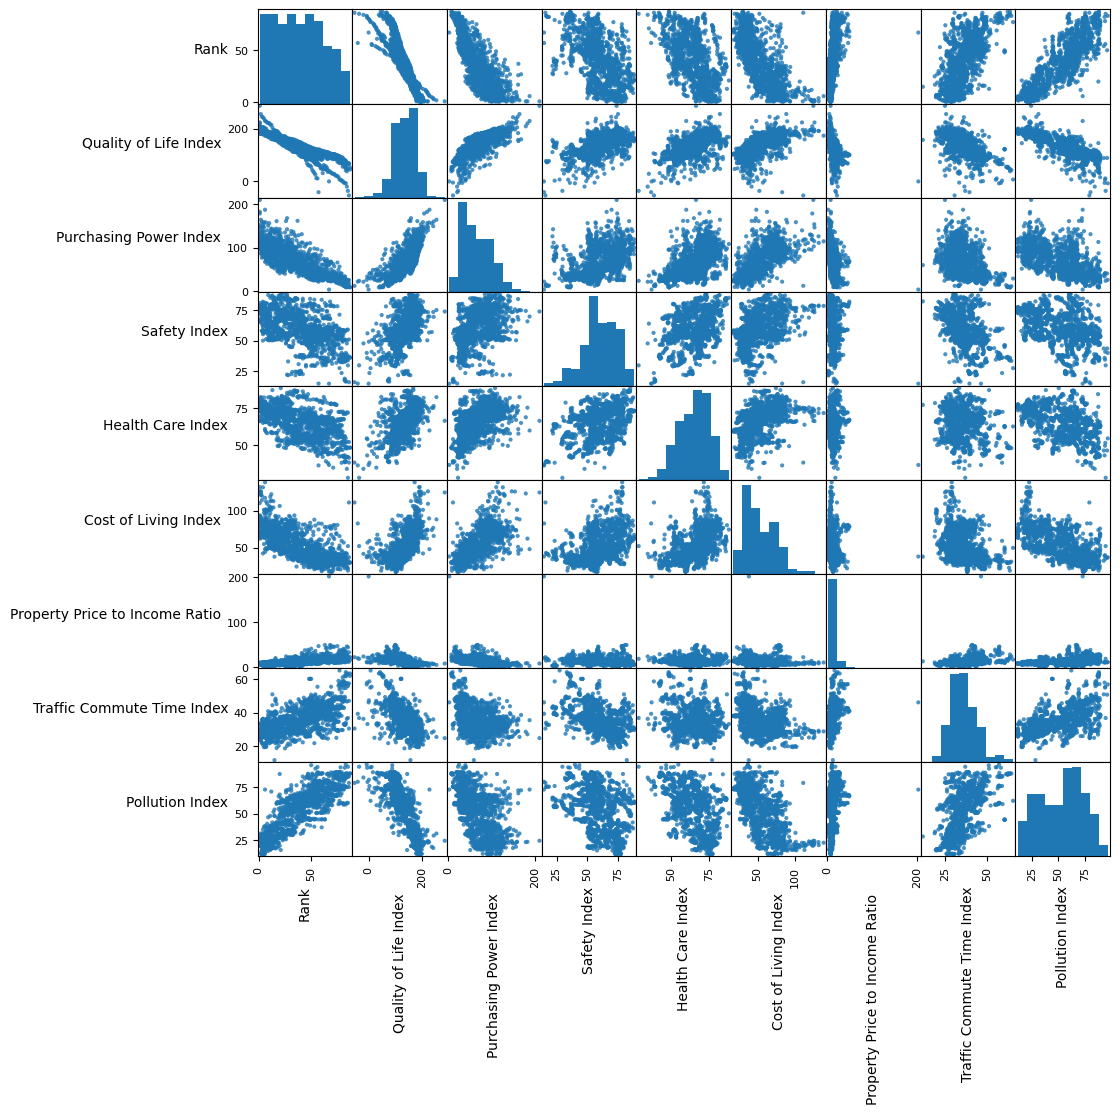

In [18]:
########### ANALISI MULTIVARIATA


### analisi della correlazione, nel comprendere
### le relazoioni ta diverse variabili nel dataset, ovvero come tendono a variare 'una rispetto all altra



# metodo molto usato per visualizzare graficamente la distribuzione relativa di diverse features

import matplotlib.pyplot as plt
import pandas as pd


axes = pd.plotting.scatter_matrix(data,figsize=(11,11),alpha=0.8)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()



# abbiamo nelle varie cose la relazione tra due variabili
#nella diagonale vediamo la distribuzione tramite istogrammi dei dati delle varie variabili


In [ ]:
# ogni cella corrisponden ad una combinazione della variabili

# teoricamente possiamo poi calcolare il coefficiente di correlazione

# si possono calcalre differenti coefficienit di correlazione





In [41]:
# viasuallizzazione dei dati


# stampo solo quelli del 2015
# questo lo potrei fare per ogni colonna e scrivere qualcosa slle classifiche

data.where(data['Country'].astype(str)=="2015").dropna()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year


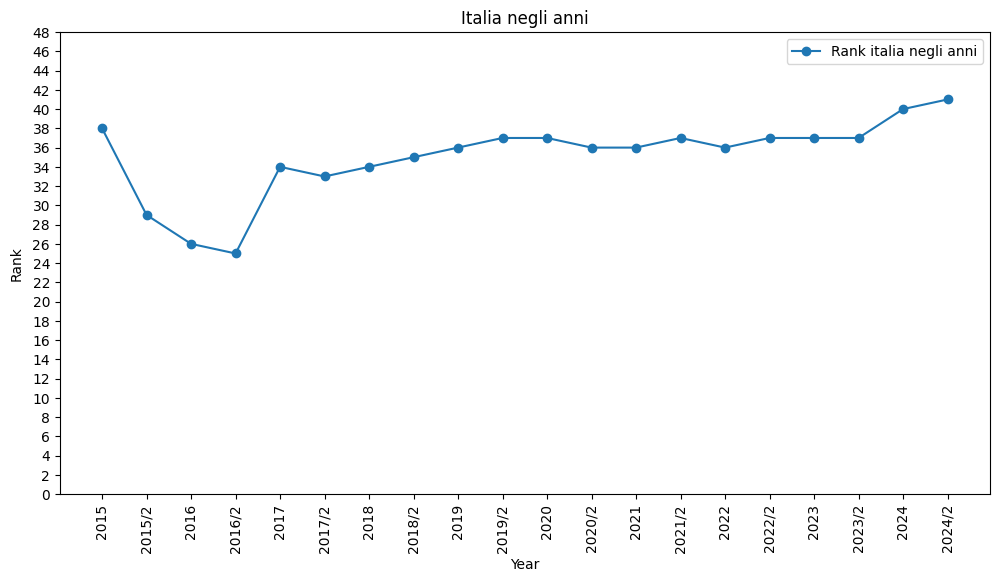

In [41]:
import numpy as np

plt.figure(figsize=(12,6))

italy_data =data.where(data['Country'].astype(str)=="Italy").dropna()
plt.plot(italy_data['Year'],italy_data['Rank'],label='Rank italia negli anni', marker='o' )
plt.title("Italia negli anni")
plt.xlabel('Year')
plt.ylabel("Rank",labelpad=6.0)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,50,2))
plt.legend()
plt.show()


# posso qui vedere cosa è successo nel 2016


#posso vedere tutti quelli che hanno ranking basso che parametri in comune hanno

# posso confrontare con altre nazioni



# posso fare regressione per vedere previsto ranking in base a determinati parametri


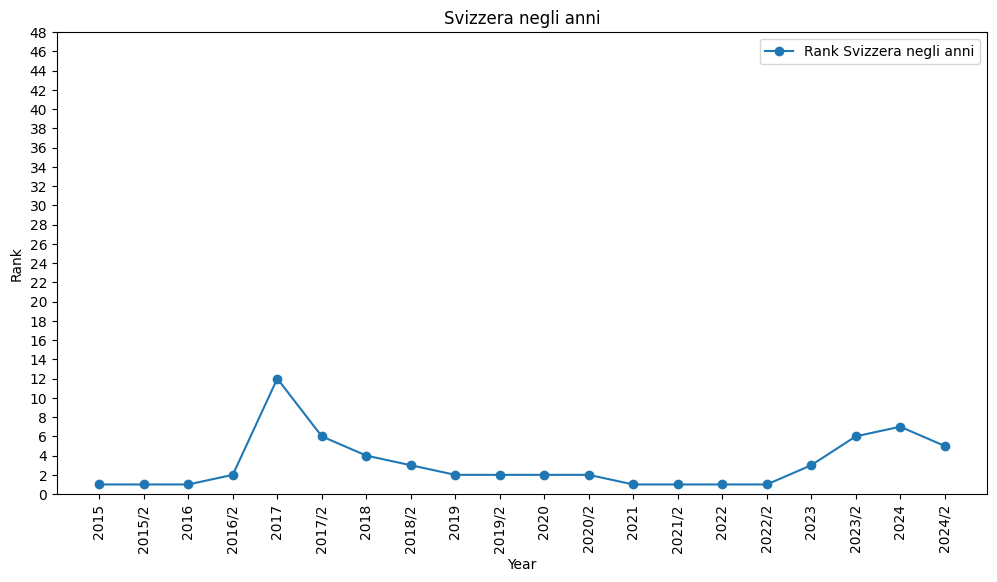

In [42]:
swiss_data =data.where(data['Country'].astype(str)=="Switzerland").dropna()
plt.figure(figsize=(12,6))
plt.plot(swiss_data['Year'],swiss_data['Rank'],label='Rank Svizzera negli anni', marker='o' )
plt.title("Svizzera negli anni")
plt.xlabel('Year')
plt.ylabel("Rank")
plt.xticks(rotation=90)
plt.yticks(np.arange(0,50,2))
plt.legend()
plt.show()


# a cosa corrispondono i casi in cui la svizzera non è stata prima?


## CONCLUSIONI

Le conclusioni che sono uscite da questo progetto